In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Aspect Ratio
- Contours Line의 가로, 세로 비율 속성      
$Aspect Ratio = {Width \over Height}$

In [33]:
img = cv2.imread('src/hand.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
cnt

array([[[627, 159]],

       [[628, 158]],

       [[647, 158]],

       ...,

       [[621, 160]],

       [[623, 160]],

       [[624, 159]]], dtype=int32)

In [34]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print(x, y, w, h)
print(aspect_ratio)

163 158 974 984
0.9898373983739838


# Extend
- Contour를 포함하는 Bbox 대비 Contour 면적   
$Extend = {Contour Area \over Bounding Rectangle Area}$

In [35]:
cnt_area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extend = cnt_area/rect_area
print(extend)


0.47741638286506066


# Solidity
- Convex Hull 대비 Contour 면적   
$Solidity = {Contour Area \over Convex Hull Area}$

In [36]:
cnt_area = cv2.contourArea(cnt)
convexHull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(cnt)
solidity = cnt_area/hull_area
print(solidity)

1.0


# Extream Points
- Contour Line의 좌,우,상,하 끝점을 찾는 방법

In [37]:
# cnt[:,:,0].argmin() --> 가장 작은 x좌표의 index
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost, rightmost, topmost, bottommost)

(163, 909) (1136, 461) (628, 158) (688, 1141)


# sample code

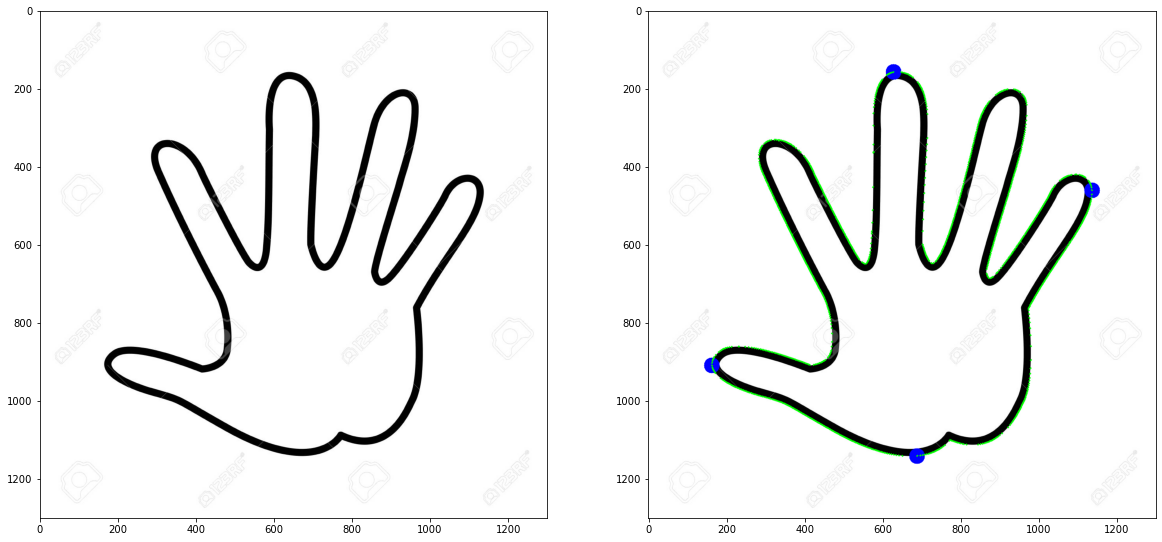

In [59]:
img = cv2.imread('src/hand.jpg')
img1 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

points = [leftmost, rightmost, topmost, bottommost]
for p in points:
    cv2.circle(img1, p, 20, (0,0,255), -1)
img1 = cv2.drawContours(img1, cnt, -1, (0,255,0), 3)

plt.figure(figsize = (20,12))
plt.subplot(121); plt.imshow(img)
plt.subplot(122); plt.imshow(img1)
plt.show()